In [1]:
import tensorflow as tf
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt

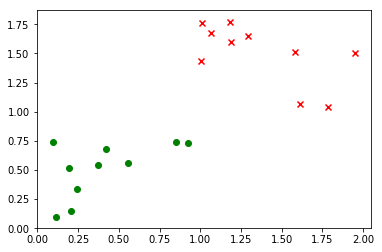

In [2]:
n_features = 2

def get_data():
    data_a = np.random.rand(10, n_features) + 1
    data_b = np.random.rand(10, n_features)
    
    plt.scatter(data_a[:, 0], data_a[:, 1], c='r', marker='x')
    plt.scatter(data_b[:, 0], data_b[:, 1], c='g', marker='o')
    plt.show()
    
    return data_a, data_b

data_a, data_b = get_data()

In [5]:
n_hidden=10

In [3]:
with tf.name_scope("input"):
    x1 = tf.placeholder(tf.float32, [None, n_features], name="x1")
    x2 = tf.placeholder(tf.float32, [None, n_features], name="x2")
    dropout_keep_prob = tf.placeholder(tf.float32, name='dropout_prob')

In [6]:
with tf.name_scope("hidden_layer"):
    with tf.name_scope("weights"):
        w1 = tf.Variable(tf.random_normal([n_features, n_hidden]), name="w1")
        tf.summary.histogram("w1", w1)
        b1 = tf.Variable(tf.random_normal([n_hidden]), name="b1")
        tf.summary.histogram("b1", b1)
 
    with tf.name_scope("output"):
        h1 = tf.nn.dropout(tf.nn.relu(tf.matmul(x1,w1) + b1), keep_prob=dropout_keep_prob)
        tf.summary.histogram("h1", h1)
        h2 = tf.nn.dropout(tf.nn.relu(tf.matmul(x2, w1) + b1), keep_prob=dropout_keep_prob)
        tf.summary.histogram("h2", h2)

W0802 11:41:50.007258 4698224064 deprecation.py:506] From <ipython-input-6-baf801540513>:9: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
with tf.name_scope("output_layer"):
    with tf.name_scope("weights"):
        w2 = tf.Variable(tf.random_normal([n_hidden, 1]), name="w2")
        tf.summary.histogram("w2", w2)
        b2 = tf.Variable(tf.random_normal([1]), name="b2")
        tf.summary.histogram("b2", b2)
 
    with tf.name_scope("output"):
        s1 = tf.matmul(h1, w2) + b2
        s2 = tf.matmul(h2, w2) + b2

In [8]:
with tf.name_scope("loss"):
    s12 = s1 - s2
    s12_flat = tf.reshape(s12, [-1])
    
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(
                        labels=tf.zeros_like(s12_flat), 
                        logits=s12_flat + 1)
    
    loss = tf.reduce_mean(cross_entropy)
    tf.summary.scalar("loss", loss)

with tf.name_scope("train_op"):
    train_op = tf.train.AdamOptimizer(0.001).minimize(loss)


W0802 11:42:23.462954 4698224064 deprecation.py:323] From <ipython-input-8-89aa371db3e3>:7: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [10]:
sess = tf.InteractiveSession()
summary_op = tf.summary.merge_all()
writer = tf.summary.FileWriter("../data/cache/tb_files", sess.graph)
init = tf.global_variables_initializer()
sess.run(init)

/Users/mattmann/git/buildout.python/python-3.7/lib/python3.7/site-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [11]:
for epoch in range(0, 10000):
    loss_val, _ = sess.run([loss, train_op], feed_dict={x1:data_a, x2:data_b, dropout_keep_prob:0.5})                                    #A
    if epoch % 100 == 0 :
        summary_result = sess.run(summary_op, 
                                  feed_dict={x1:data_a,
                                             x2:data_b,
                                             dropout_keep_prob:1})
        writer.add_summary(summary_result, epoch)


In [12]:
grid_size = 10
data_test = []
for y in np.linspace(0., 1., num=grid_size):
    for x in np.linspace(0., 1., num=grid_size):
        data_test.append([x, y])

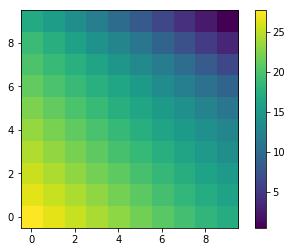

In [13]:
def visualize_results(data_test):
    plt.figure()
    scores_test = sess.run(s1, feed_dict={x1:data_test, dropout_keep_prob:1})
    scores_img = np.reshape(scores_test, [grid_size, grid_size])
    plt.imshow(scores_img, origin='lower')
    plt.colorbar()

visualize_results(data_test)